来源：https://wiseodd.github.io/techblog/2015/10/21/rejection-sampling/

### 简介

Rejection Sampling和Metropolis-Hastings及Gibbs Sampling一样，用于从复杂的target distribution $P(x)$中进行采样（直接从target distribution中采样很难）。Rejction Sampling要使用一个易于采样的proposal distribution $Q(x)$，并且要满足存在某个$k$，使得对于所有$x$，有$kQ(x) > P(x)$。也就是说，target distribution要完全被proposal distribution包住。

### 代码实现

In [2]:
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

In [3]:
"""
    target distribution
    
    两个高斯分布的混合，未归一化
"""
def p(x):
    return st.norm.pdf(x, loc=30, scale=10) + st.norm.pdf(x, loc=80, scale=20)


"""
    proposal distribution
"""
def q(x):
    return st.norm.pdf(x, loc=50, scale=30)


x = np.arange(-50, 151)
k = max(p(x) / q(x))

两个分布的图像如下：

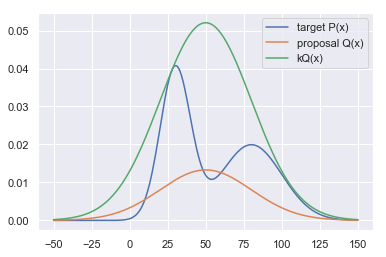

In [8]:
plt.plot(x, p(x), label="target P(x)")
plt.plot(x, q(x), label="proposal Q(x)")
plt.plot(x, k*q(x), label="kQ(x)")
plt.legend()
plt.show()

Rejection Sampling的算法如下：

In [9]:
"""
    Rejection Sampling
    
    1.先从Q分布中采样一个点z，由于Q的定义域与P的定义域相同，所有采样不会遗漏
    2.然后从U(0, kQ(z))中采一个点u，如果u<P(z)，就接受样本z
    
    关键：首先，第2步中，P(z)越大，z被采样的概率也就越大，所以rejection sampling是
          合理的
          其次，假设kQ(x)没有包住P(x)，比如上图的Q(x)和P(x)，那么凡是Q(x)<P(x)部分
          的样本点z，接受率全都是100%，所以最后这部分样本点服从的是分布Q而非分布P，
          或者说“低估了”P中高密度的区域。所以一定要使得kQ(x)完全包住P(x)，这样在
          采样时是否保留样本点z的准则就是看分布P(z)的大小，这样就与Q无关了，或者说，
          P中各部分能充分拉开差别而不被Q所掩盖。
              ——— 一句话概括，决定分布的是下方的概率密度曲线
"""

def rejection_sampling(iterations=1000):
    samples = []

    for i in range(iterations):
        z = np.random.normal(50, 30)
        u = np.random.uniform(0, k*q(z))

        if u <= p(z):
            samples.append(z)

    return np.array(samples)

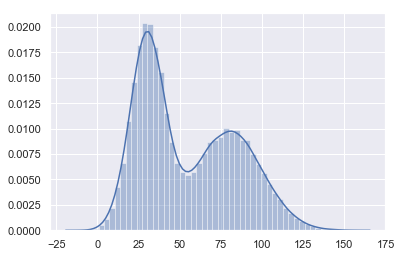

In [12]:
s = rejection_sampling(100000)
sns.distplot(s)

Rejection Sampling的方法比较简单，但这种方法有以下缺点：

首先Q(x)的挑选需要很好的直觉，kQ(x)必须包住P(x)，但target distribution比较复杂时，通常很难知道其形状，所以Q(x)很难选择。

在计算k时也要注意要使得kQ(x)要“刚刚好”包住P(x)，加入k过大，那么虽然可以包住P(x)，但这样采样效率就会很低。